# *Итоговый проект по курсу "Python для анализа данных"*

### *ЦЕЛЬ*
оценить уровень удовлетворенности сотрудниками работой

### *ЗАДАЧИ*

 1. Загрузка данных


 2. Первичное изучение данных


 3. Работа с пропусками


 4. Рассчитать базовые статистики


 5. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


 6. Осуществить статистический анализ данных с помощью методов статистического анализа


 7. Построить модель LDA




### *КОНКРЕТНЫЕ ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ)*

1. Загрузите файл HR.csv в pandas dataframe

2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

3.	Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.

    Определите две самые скоррелированные и две наименее скоррелированные переменные.

4.	Рассчитайте сколько сотрудников работает в каждом	 департаменте.

5.	Показать распределение сотрудников по зарплатам.	

6.	Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

7.	Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

8.	Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

- Доля сотрудников с повышением за последние 5 лет 

- Средняя степень удовлетворенности

- Среднее количество проектов

9.	Разделить данные на тестовую и обучающую выборки

    Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

    Оценить качество модели на тестовой выборки

10. Загрузить jupyter notebook с решение на github и прислать ссылку   


In [155]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1. Загрузите файл HR.csv в pandas dataframe

In [7]:
# загрузим и ознакомимся с данными
data = pd.read_csv('data/HR.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
# Ознакомимся со значениями столбцов
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Признаки столбцов:

1.   satisfaction_level- Уровень удовлетворенности работой
2.   Last_evaluation - Время с момента последней оценки в годах
3.   number_projects- Количество проектов, выполненных за время работы
4.   average_monthly_hours- Среднее количество часов на рабочем месте в месяц 
5.   time_spend_company- Стаж работы в компании в годах
6.   work_accident- Происходили ли несчастные случаи на рабочем месте с сотрудником 
7.   left- уволился ли сотрудник
8.   promotion_last_5years- повышался ли сотрудник за последние пять лет 
9.   department - отдел в котором работает сотрудник
10.  salary- относительный уровень зарплаты


In [8]:
# ознакомимся с данными с помощью атрибута  dtypes и методов  describe, info
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

In [11]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [35]:
data.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Изучим значения по слолбцам

In [36]:
# Уровень удовлетворенности работой

print('Уровень удовлетворенности работой: ')
print('- mean:', data['satisfaction_level'].mean())
print('- median:',  data['satisfaction_level'].median())
print('- mode:',  data['satisfaction_level'].mode()[0])
print('- min:',  data['satisfaction_level'].min())
print('- max:',  data['satisfaction_level'].max())
print('- std:',  data['satisfaction_level'].std())


Уровень удовлетворенности работой: 
- mean: 0.6128335222348156
- median: 0.64
- mode: 0.1
- min: 0.09
- max: 1.0
- std: 0.24863065106114257


In [37]:
print('Время с момента последней оценки в годах ')
print('- mean:', data['last_evaluation'].mean())
print('- median:',  data['last_evaluation'].median())
print('- mode:',  data['last_evaluation'].mode()[0])
print('- min:',  data['last_evaluation'].min())
print('- max:',  data['last_evaluation'].max())
print('- std:',  data['last_evaluation'].std())

Время с момента последней оценки в годах 
- mean: 0.7161017401160078
- median: 0.72
- mode: 0.55
- min: 0.36
- max: 1.0
- std: 0.17116911062327533


In [38]:
data['number_project'].unique()
print('Количество проектов, выполненных за время работы ')
print('- mean:', data['number_project'].mean())
print('- median:',  data['number_project'].median())
print('- mode:',  data['number_project'].mode()[0])
print('- min:',  data['number_project'].min())
print('- max:',  data['number_project'].max())
print('- std:',  data['number_project'].std())

Количество проектов, выполненных за время работы 
- mean: 3.80305353690246
- median: 4.0
- mode: 4
- min: 2
- max: 7
- std: 1.2325923553183522


In [39]:

data['average_montly_hours'].unique()
print('Среднее количество часов на рабочем месте в месяц ')
print('- mean:', data['average_montly_hours'].mean())
print('- median:',  data['average_montly_hours'].median())
print('- mode:',  data['average_montly_hours'].mode()[0])
print('- min:',  data['average_montly_hours'].min())
print('- max:',  data['average_montly_hours'].max())
print('- std:',  data['average_montly_hours'].std())

Среднее количество часов на рабочем месте в месяц 
- mean: 201.0503366891126
- median: 200.0
- mode: 135
- min: 96
- max: 310
- std: 49.94309937128408


In [40]:

data['time_spend_company'].unique()
print('Стаж работы в компании в годах')
print('- mean:', data['time_spend_company'].mean())
print('- median:',  data['time_spend_company'].median())
print('- mode:',  data['time_spend_company'].mode()[0])
print('- min:',  data['time_spend_company'].min())
print('- max:',  data['time_spend_company'].max())
print('- std:',  data['time_spend_company'].std())

Стаж работы в компании в годах
- mean: 3.498233215547703
- median: 3.0
- mode: 3
- min: 2
- max: 10
- std: 1.4601362305354812


In [41]:

data['Work_accident'].unique()
print('Происходили ли несчастные случаи на рабочем месте с сотрудником ')
print('- mean:', data['Work_accident'].mean())
print('- median:',  data['Work_accident'].median())
print('- mode:',  data['Work_accident'].mode()[0])
print('- min:',  data['Work_accident'].min())
print('- max:',  data['Work_accident'].max())
print('- std:',  data['Work_accident'].std())

Происходили ли несчастные случаи на рабочем месте с сотрудником 
- mean: 0.1446096406427095
- median: 0.0
- mode: 0
- min: 0
- max: 1
- std: 0.35171855238017985


In [42]:

data['left'].unique()
print('уволился ли сотрудник')
print('- mean:', data['left'].mean())
print('- median:',  data['left'].median())
print('- mode:',  data['left'].mode()[0])
print('- min:',  data['left'].min())
print('- max:',  data['left'].max())
print('- std:',  data['left'].std())

уволился ли сотрудник
- mean: 0.2380825388359224
- median: 0.0
- mode: 0
- min: 0
- max: 1
- std: 0.4259240993802994


In [43]:

data['promotion_last_5years'].unique()
print('повышался ли сотрудник за последние пять лет ')
print('- mean:', data['promotion_last_5years'].mean())
print('- median:',  data['promotion_last_5years'].median())
print('- mode:',  data['promotion_last_5years'].mode()[0])
print('- min:',  data['promotion_last_5years'].min())
print('- max:',  data['promotion_last_5years'].max())
print('- std:',  data['promotion_last_5years'].std())

повышался ли сотрудник за последние пять лет 
- mean: 0.021268084538969265
- median: 0.0
- mode: 0
- min: 0
- max: 1
- std: 0.14428146457858232


In [53]:

data['department'].unique()
print('отдел в котором работает сотрудник')
print('- mode:',  data['department'].mode()[0])
print('- min:',  data['department'].min())
print('- max:',  data['department'].max())


отдел в котором работает сотрудник
- mode: sales
- min: IT
- max: technical


In [54]:

data['salary'].unique()
print('относительный уровень зарплаты')
print('- mode:',  data['salary'].mode()[0])
print('- min:',  data['salary'].min())
print('- max:',  data['salary'].max())

относительный уровень зарплаты
- mode: low
- min: high
- max: medium


## 3.  Расчет и визуализация корреляционной матрицы для количественных переменных.

In [58]:
# ознакомимся с типами данных с помощью атрибута  dtypes 
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [60]:
# cоздадим матрицу корреляции
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Коэффициенты корреляции по диагонали таблицы равны 1, потому что каждая переменная совершенна коррелирует сам с собой.
Все остальные коэффициенты корреляции указывают на корреляцию между различными попарными комбинациями переменных.

In [69]:
# визуализация корреляционной матрицы
corr = data.corr()
corr.style.background_gradient(cmap='RdYlGn')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


из визуализации можно выделить следующее:
- две самые скоррелированные переменные  -1. average_montly_hours и  number_project	2. last_evaluation	и number_project	
- две наименее скоррелированные переменные -1. satisfaction_level и  left	2. Work_accident	и left	

## 4.  Рассчитайте сколько сотрудников работает в каждом    департаменте.

In [79]:
data[['department','time_spend_company']]\
    .groupby(by=["department"]) \
    .count() \
    .reset_index() \
    .sort_values('time_spend_company') \
    .style.bar(align='mid', color='lightgreen')

,department,time_spend_company
4,management,630
3,hr,739
2,accounting,767
1,RandD,787
5,marketing,858
6,product_mng,902
0,IT,1227
8,support,2229
9,technical,2720
7,sales,4140


## 5.  Показать распределение сотрудников по зарплатам.    

In [81]:
data['salary'].value_counts()

high      1237
medium    6446
low       7316
Name: salary, dtype: int64

## 6.  Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [96]:
# data[['department','salary']]\
data[['department','salary']].groupby("department", group_keys=True).apply(lambda x: x).agg('count')

department    14999
salary        14999
dtype: int64

In [118]:
data[['department','salary']]\
    .groupby(['department','salary']) \
    .agg({'salary':'count'}) \
    .rename(columns={"salary": "count_salary"})

count_salary
department  salary              
IT          high              83
            low              609
            medium           535
RandD       high              51
            low              364
            medium           372
accounting  high              74
            low              358
            medium           335
hr          high              45
            low              335
            medium           359
management  high             225
            low              180
            medium           225
marketing   high              80
            low              402
            medium           376
product_mng high              68
            low              451
            medium           383
sales       high             269
            low             2099
            medium          1772
support     high             141
            low             1146
            medium           942
technical   high             201
            low             1372
            medium          1147

## 7.  Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Сравним  количество часов на рабочем месте в месяц  для сотрудников с высоким и низким окладом. Если показатель отличается, выяснить, насколько.

In [151]:
data[['average_montly_hours', 'salary']]\
    .groupby('salary').mean()

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


In [168]:
df_high = list(data.loc[data['salary'] == 'high']['average_montly_hours'])
df_low = list(data.loc[data['salary'] == 'low']['average_montly_hours'])


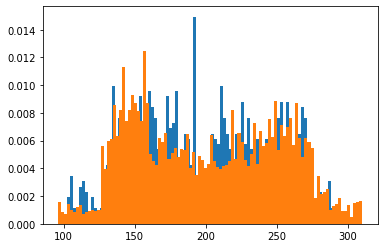

In [153]:
plt.hist(df_high, bins=100, density=True);
plt.hist(df_low, bins=100, density=True);
#уже видно, что нет разницы

In [156]:
t, p = stats.ttest_ind(df_high, df_low)
print(t, p)

-0.7288680398062308 0.4661023478267259


При уровне значимости 0.05 p больше - т.е. гипотеза не верна - оклад не влияет на рабочее время.

## 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

### **уволенные сотрудники:**

In [180]:
data_left = data[data['left'] == 1]

### - Доля сотрудников с повышением за последние 5 лет:

In [187]:
df_prom = data_left.loc[data_left['promotion_last_5years'] == 1]['promotion_last_5years'].count()
df_prom / len(data_left)

0.005320638476617194

### - Средняя степень удовлетворенности

In [188]:
data_left['satisfaction_level'].mean()

0.4400980117614114

### - Среднее количество проектов

In [189]:
data_left['number_project'].mean()

3.8555026603192384

### **работающие сотрудники:**

In [190]:
data_noleft = data[data['left'] == 0]

### - Доля сотрудников с повышением за последние 5 лет:


In [195]:
df_prom_no = data_noleft.loc[data_noleft['promotion_last_5years'] == 0]['promotion_last_5years'].count()
df_prom_no / len(data_noleft)

0.9737486874343717

### - Средняя степень удовлетворенности


In [196]:

data_noleft['satisfaction_level'].mean()


0.666809590479524


### - Среднее количество проектов


In [197]:

data_noleft['number_project'].mean()

3.786664333216661

# 9.  Разделить данные на тестовую и обучающую выборки

    Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

    Оценить качество модели на тестовой выборки


In [200]:
left = pd.array(data['left'])

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left, test_size=0.20)

In [203]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [204]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [205]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
2995,0.0,0.0
2996,0.0,0.0
2997,0.0,0.0
2998,0.0,1.0


In [206]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.767

Судя по п.3 у нас на увольнение мало какие другие данные влияют, так что не удивительно, что не 100% попадание